In [2]:
%run kmeans

# Table of Contents
1. [Description](#description)
2. [Workflow](#Workflow)
	1. [Kmeans](#km)
	2. [Kmeans ++](#km+)
	3. [Applications](#app)
	4. [Advanced topic: RF + Kmeans](#rf+km)
	5. [Limitations](#mf)
7. [References](#ref)

<a name="description"></a>
# Description
For this project, I implemented the K-means as well as the kmeans++ algorithm from scratch. I used five data sets to showcase some applications and results of those algorithms. Further, after uncovering the drawbacks of Kmeans, I implemented a ‘Spectral clustering’ using the random forest (RF) technique paired with kmeans++ to overcome the ‘discontinuity of clusters’ issue. Lastly, I addressed some limitations and possible improvements for future research reference.

One interesting human behavior is that we like to ‘group’ things together because grouped objects share some similar attributes, and those similarities can help us conveniently analyze both generally and in depth. For example, to identify who will more likely be a customer knowing existing customer attributes.

In the world of data science, we refer to this kind of work as ‘unsupervised machine learning.’ The most commonly used clustering method is K-Means because of its simplicity.

<a name="Workflow"></a>
# Workflow
<a name="km"></a>
## Kmeans
Let’s say we want to organize a bunch of lego pieces that come in different colors and shapes into three groups. What we do is randomly pick out 3 pieces of lego (one for each group), and those initial ‘centroid’ of lego pieces will now dictate which of the remaining pieces will go in which group. Now we can just pick up a new lego piece and compare its color (for example) to our three centroids and put it where their colors are most similar, we iterate this step until we put all remaining pieces where they belong by color.

But once we are done, we might notice if using different lego pieces to start with or using shapes as grouping categories can result in better groups. So we can repeat the clustering process to find a better outcome. This is essentially how K-Means works!

### Procedure :

1. Initialize centroids:

Randomly initialize k number of data points from the original X data. The number of k depends on how many clusters we want to end up with.

2. Compute distance:

Here I used Euclidean distance to measure the distance from each of the remaining data points to each of the centroids we initialized in step 1, assigning each of the remaining data points to the ‘closest ’ centroids.
> NOTE: there will be a chance a centroid is initialized to be a “far-off” point and end up with no points associated with it. In order to prevent this while keeping the desired number of clusters, I randomly pick another data point and replace the ‘empty’ centroid with this data point.


<img src ='https://raw.githubusercontent.com/USF-MSDS689/kmeans-victorlifan/main/img/l2_cal.png?token=GHSAT0AAAAAABPPQC3XSIO4XGUFQGAGSWR2YSD62BQ'>

3. Update centroids:

Within each cluster, compute the average distance of all the data points to that centroid FEATURE WISE. This average distance will be the new centroids’ ‘coordinate’ in that cluster. Intuitively speaking, this means we are correcting the centroids to be the ‘center’ of that cluster. This means our final centroids will most likely not be members of the dataset. The reason we picked data points from the dataset as initial centroids is simply to assign a starting point.

> REFLECTION: 

> During the first attempt instead of using the feature-wise averages, I used the overall average of data points in each cluster to update the centroids for the next iteration. This was a mistake and got brought out in multi-dimension data sets: centroids’ features share the same values which are the overall dataset’s average in that cluster, then for every iteration centroids were corrected in only one direction, but instead, centroids should be corrected and pulled in every direction in multi-dimension in order to truly reach the ‘center’ of that cluster. The correct approach is to take the feature-wise average and update the corresponding centroid’s feature coordinates.

<img src = 'https://raw.githubusercontent.com/USF-MSDS689/kmeans-victorlifan/main/img/feature_wise_avg.png?token=GHSAT0AAAAAABPPQC3XPS3KKY3C2AWZ6XYWYSD623Q'>

4. Reassign data point

Finally, compute distance, reassign data points according to the <font color = 'red'>new</font> centroids we updated in step 3, update centroids. Iterate the above process until the centroids’ ‘coordinates’ don’t change anymore.


> NOTE: To prevent the algorithm from taking too long to update centroids and find the ‘optimum’, I used both max iterations and ‘average distance to centroids’ tolerance bonds to limit the iteration process.


### Test on data
#### Synthetic data set
To test and play with our algorithm I started with a small synthetic data which has a shape of 16*1

In [2]:
# load data
grades = [92.65,93.87,74.06,86.94,92.26,94.46,92.94,80.65,92.86,85.94,91.79,95.23,85.37,87.85,87.71,93.03]
grades = np.array(grades).reshape(-1,1)
k = 3
X = grades
max_iter=30
tolerance=1e-2
centroids = None
print(grades.shape)

(16, 1)


> For comparison purposes, let’s run three rounds to see the difference:

In [3]:
for i in range(3):
    print(f'round: {i+1}')
    centriods, labels = kmeans(grades,k, centroids='kmeans',verbose=True)
    print()
    print(f'final labels: {labels}\n')
    print('Clusters:')
    for j in range(k):
        print(grades[np.array(labels) ==j].reshape(1,-1))
    print("="*50)

round: 1
init centroids:
[[80.65]
 [92.94]
 [93.87]]


 13%|█████▌                                    | 4/30 [00:00<00:00, 1742.18it/s]


final norm:  0.0
final centroids: 
[[77.355     ]
 [86.762     ]
 [93.23222222]]

final labels: [2 2 0 1 2 2 2 0 2 1 2 2 1 1 1 2]

Clusters:
[[74.06 80.65]]
[[86.94 85.94 85.37 87.85 87.71]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
round: 2
init centroids:
[[93.87]
 [91.79]
 [92.26]]


  7%|██▊                                       | 2/30 [00:00<00:00, 1904.77it/s]


final norm:  0.0
final centroids: 
[[94.52      ]
 [84.07428571]
 [92.58833333]]

final labels: [2 0 1 1 2 0 2 1 2 1 2 0 1 1 1 2]

Clusters:
[[93.87 94.46 95.23]]
[[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
[[92.65 92.26 92.94 92.86 91.79 93.03]]
round: 3
init centroids:
[[94.46]
 [86.94]
 [91.79]]


  3%|█▍                                        | 1/30 [00:00<00:00, 1342.61it/s]

final norm:  0.0
final centroids: 
[[94.52      ]
 [84.07428571]
 [92.58833333]]

final labels: [2 0 1 1 2 0 2 1 2 1 2 0 1 1 1 2]

Clusters:
[[93.87 94.46 95.23]]
[[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
[[92.65 92.26 92.94 92.86 91.79 93.03]]


As we expected, each rounds’ initial centroids are different due to the mechanism of random initialization. This goes without saying, but the algorithm produces slightly different final centroids, labels, and clusters. The good news is all the final norms are 0, which means those clusters make perfect sense in each of their own round’s ‘world’.

But this is sensitive to the initialization of the centroids or the mean points can be problematic. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid. Similarly, more than one centroid might be initialized into the same cluster resulting in poor clustering. How can we do better?

---

<a name="km+"></a>
## Kmeans ++

One of the simplest approaches is to find a better set of centroids to start with. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm.

So, what can be considered as better centroids? The ultimate goal of the cluster is to group data that share similar attributes, in other words, different clusters should be significantly different from each other. To put in mathematical terms, they should have the largest Euclidean distance.


### Procedure:
1. Initialize centroids:

Randomly select the <font color = 'red'>FIRST</font> centroid from the data points.

2. Compute distance:

For each data point compute its distance from the nearest, previously chosen centroid

3. Next centoid: 

Select the next centroid from the data points such that the point has a maximum distance from the preciously chosen centroid (2nd centroid is the furthest from the 1st centroids, 3rd is the furthest from the 2nd, etc.)

4. Repeat steps 2 and 3 until k centroids have been sampled


### Intuition

By picking up centroids that are far away from one another, it increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.

### Test on data
#### Synthetic data set
Now let's try the same synthetic data again and see the reults

In [4]:
for i in range(3):
    print(f'round: {i+1}')
    centriods, labels = kmeans(grades,k, centroids='kmeans++',verbose=True)
    print()
    print(f'final labels: {labels}\n')
    print('Clusters:')
    for j in range(k):
        print(grades[np.array(labels) ==j].reshape(1,-1))
    print("="*50)

round: 1
!!!!activate kmeans++!!!!
init centroids:
[[94.46]
 [74.06]
 [95.23]]


 10%|████▎                                      | 3/30 [00:00<00:00, 923.11it/s]


final norm:  0.0
final centroids: 
[[86.762     ]
 [77.355     ]
 [93.23222222]]

final labels: [2 2 1 0 2 2 2 1 2 0 2 2 0 0 0 2]

Clusters:
[[86.94 85.94 85.37 87.85 87.71]]
[[74.06 80.65]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
round: 2
!!!!activate kmeans++!!!!
init centroids:
[[85.37]
 [74.06]
 [95.23]]


  3%|█▍                                         | 1/30 [00:00<00:00, 924.87it/s]


final norm:  0.0
final centroids: 
[[85.74333333]
 [74.06      ]
 [93.23222222]]

final labels: [2 2 1 0 2 2 2 0 2 0 2 2 0 0 0 2]

Clusters:
[[86.94 80.65 85.94 85.37 87.85 87.71]]
[[74.06]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
round: 3
!!!!activate kmeans++!!!!
init centroids:
[[95.23]
 [74.06]
 [94.46]]


 10%|████▏                                     | 3/30 [00:00<00:00, 2219.99it/s]

final norm:  0.0
final centroids: 
[[93.23222222]
 [77.355     ]
 [86.762     ]]

final labels: [0 0 1 2 0 0 0 1 0 2 0 0 2 2 2 0]

Clusters:
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
[[74.06 80.65]]
[[86.94 85.94 85.37 87.85 87.71]]


We can see from the above result, all clusters correctly isolated the smallest point, `74.06`, all the points above 90, 80 are grouped together accordingly. The only ‘uncertain’ point, `80.65`, is barely above 80 and sometimes got clustered with `74.06`, this is reasonable.

#### Multi-dimension data (Circle data 500*2)

(500, 2)


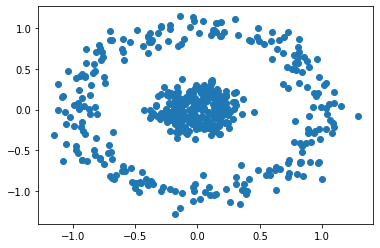

In [5]:
# load data
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
print(X.shape)
plt.scatter(X[:,0], X[:,1]);

We can tell there are two clear clusters, an outer ring and an inside circle. How will our algorithm perform?

!!!!activate kmeans++!!!!
init centroids:
[[ 0.05288413  0.30837681]
 [-0.17904103 -1.2837174 ]]


 17%|███████▏                                   | 5/30 [00:00<00:00, 975.19it/s]

final norm:  0.002649663517220632
final centroids: 
[[ 0.03001127  0.20907309]
 [-0.09123316 -0.69452279]]
[[ 0.03001127  0.20907309]
 [-0.09123316 -0.69452279]]


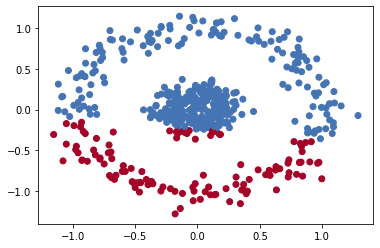

In [6]:
centroids, labels = kmeans(X, 2,verbose=True,centroids='kmeans++')
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show();

> AAs you can see, kmeans performs poorly on disjoint and nested structures. To rescue, I will introduce spectral clustering by using RF and kmeans together in the [Advanced topic section](#rf+km).

---

<a name="app"></a>
## Application
### Breast cancer

Now kmeans is up and running and we can cluster given X into a certain number of groups we want to, so then how do we know how good our prediction is? The problem boils down to how do we know which centroid is associated with which true label (we don't have the y target to work with during clustering)?

#### Match cluster labels to true target labels: 

>One of the solutions I can think of is to compare the actual 1s’ in target y against the predicted label 1s’ in $\hat{y}$. The intuition behind this is to simply get a ratio of $\hat{y_{1}}\div y_{1}$, we know by baseline model, this ratio would be around 0.5, if this ratio is above a certain threshold (0.6 for example), we can claim our $\hat{y}$ label matches the true y target label ($\hat{y_{1}}= y_{1}$), otherwise, our $\hat{y}$ label is exactly the opposite of the true y target label ($\hat{y_{1}}= y_{0}$) and we just need to flip either $\hat{y}$ label or y target label.

#### Scale X so that distances mean the same in all dimensions
> Another point worth stressing is to scale the X before feeding it to the model. Kmeans is a distance-based algorithm, the process of updating previous centroids is heavily dependent on the distance of each direction (features) of each point to previous centroids. We can imagine one feature is between `[0,1]` while another is between `[1000,10000]` would cause centroids to get pulled a lot in large-scaled feature and barely any in small-scaled feature. Only scaling all X features to the same scale would optimize the algorithm performance.

#### Compare model performance w/o scaling X
##### without scaling:

In [7]:
# load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target # y = 0 means cancer, y =1 benign
# Make sure to scale so that distances mean the same in all dimensions
sc = StandardScaler()
X_scale = sc.fit_transform(X)
k = 2
X_scale.shape

(569, 30)

!!!!activate kmeans++!!!!


 33%|█████████████▋                           | 10/30 [00:00<00:00, 1498.13it/s]

final norm:  0.0

1st cluster shape: (438, 30)
2nd cluster shape: (131, 30)

predicted lable 1s': 131
actual 1s': 357
clustering accur: 0.8541300527240774


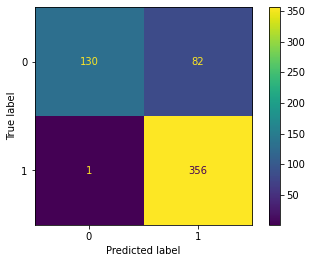

In [8]:
centroids, labels = kmeans(X,k,tolerance=0.01,centroids='kmeans++')
clusters= []
for j in range(k):
    clusters.append(X[np.array(labels) ==j])
print()
print(f"1st cluster shape: {clusters[0].shape}\n2nd cluster shape: {clusters[1].shape}")
print()
print(f"predicted lable 1s': {labels.sum()}\nactual 1s': {y.sum()}")
likely_confusion_matrix(y,labels)

##### with scaled X:

!!!!activate kmeans++!!!!


 33%|█████████████▋                           | 10/30 [00:00<00:00, 1744.57it/s]

final norm:  0.0

1st cluster shape: (381, 30)
2nd cluster shape: (188, 30)

predicted lable 1s': 188
actual 1s': 357


clustering accur: 0.9121265377855887


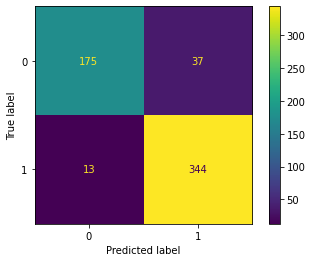

In [9]:
centroids, labels = kmeans(X_scale,k,tolerance=0.01,centroids='kmeans++')
clusters= []
for j in range(k):
    clusters.append(X[np.array(labels) ==j])
print()
print(f"1st cluster shape: {clusters[0].shape}\n2nd cluster shape: {clusters[1].shape}")
print()
print(f"predicted lable 1s': {labels.sum()}\nactual 1s': {y.sum()}")
likely_confusion_matrix(y,labels)

### Image compression
Another very interesting application of Kmeans is image compression. Rather than use millions of colors, we can usually get away with 256 or even 64 colors. The key is choosing the right colors that are representative of that image. The way to do that is to cluster in p=3 space for (red, green, blue) vectors. But, it's a good idea to start with grayscale.
#### Greyscale


size of img in bytes: 206153


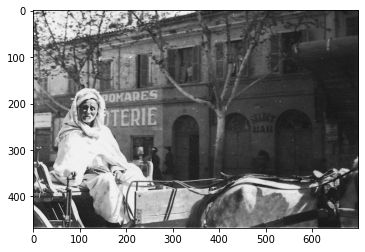

In [10]:
# load img
img= Image.open('img/north-africa-1940s-grey.png')
X =np.array(img)
h,w= X.shape
plt.imshow(Image.fromarray(X),cmap='gray')

img_zie = os.path.getsize('img/north-africa-1940s-grey.png')
print(f'size of img in bytes: {img_zie}')
X = X.reshape(-1,1)

!!!!activate kmeans++!!!!
init centroids:
[[ 52.]
 [219.]
 [  0.]
 [217.]]


 63%|███████████████████████████▏               | 19/30 [00:00<00:00, 29.32it/s]

final norm:  0.0
final centroids: 
[[ 78.25477073]
 [186.80264222]
 [ 39.74855936]
 [127.85559575]]
time: 0.6759159564971924
size of img in bytes: 36524


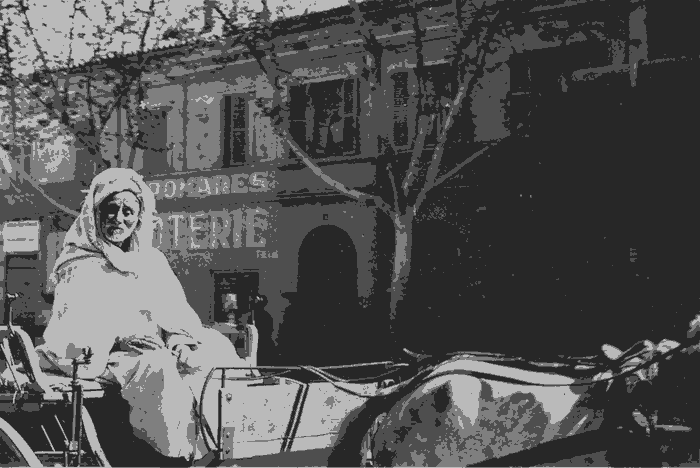

In [11]:
k=4
start = time()
centroids, labels = kmeans(X, k =k, centroids='kmeans++', tolerance=.01,verbose=True)
print(f'time: {(time()-start)}')
centroids = centroids.astype(np.uint8)

X = centroids[labels] # reassign all points
#print(X)
img_ = Image.fromarray(X.reshape(h,w),'L')
img_.save('img/gray_km.png') # save img
# get compressed img size
gc_img_zie = os.path.getsize('img/gray_km.png')
print('='*50)
print(f'size of img in bytes: {gc_img_zie}')
img_
#np.unique(labels)

> The one with just k=4 levels of gray takes less than 1 second to compress but the size in bytes is less than 20% of the original image!
#### Color
As an example of color compression, I used a photo of my professor Terence in Vancouver when he was visiting Chinatown and a compressed version that uses only 32 colors. It took about 1m to complete limited to 30 iterations:

size of img in bytes: 102017


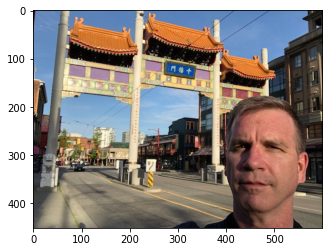

In [12]:
img= Image.open('img/parrt-vancouver.jpg')
X =np.array(img)
plt.imshow(Image.fromarray(X))

h,w,c= X.shape

c_img_zie = os.path.getsize('img/parrt-vancouver.jpg')
print(f'size of img in bytes: {c_img_zie}')

X = X.reshape((-1,3))

!!!!activate kmeans++!!!!


 97%|█████████████████████████████████████████▌ | 29/30 [00:59<00:02,  2.05s/it]

final norm:  1.71117334412604
time: 60.01272511482239
size of img in bytes: 56358


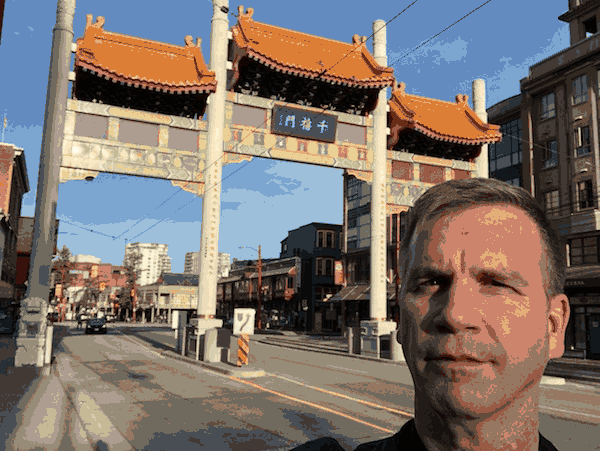

In [13]:
k=32
start = time()
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
print(f'time: {(time()-start)}')

centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
img_ = Image.fromarray(X.reshape(h,w,3))

img_.save('img/color_km.jpg') # save img
# get compressed img size
cc_img_zie = os.path.getsize('img/color_km.jpg')
print('='*50)
print(f'size of img in bytes: {cc_img_zie}')

img_

In [14]:
print(f"compressed img size is about {round(cc_img_zie/c_img_zie,4)*100}% of the original img size in bytes")

compressed img size is about 55.24% of the original img size in bytes


> Again, with only 32 colors and 30 iterations, Kmeans++ captured a very promising color pattern with 55% of the original image size (in bytes). That’s a huge amount of space-saving!

---

<a name="rf+km"></a>
## Advanced topic: RF + Kmeans
As we saw in the Circle data test, kmeans perform poorly on disjoint and nested structures. This is because kmeans tries to minimize the within-cluster sum of squares, and visually they are nice centers with neat spheres around them. But when there is categorical data or the number of dimensions gets very high, Euclidean and similar distance measures are inappropriate.

Borrowing the idea from Breiman and professor Terence, using RF we can get a similarity metric from one observation to another. This information is not directly useful in k-means, because the means are not typically observations (they are the means of a cluster of them). Thus we can’t measure the distance of a point to a cluster. Spectral clustering, however, can accept a similarity matrix. It uses linear algebra and clusters a transformed space using its own kmeans. Since we can use sklearn’s built-in `SpectralClustering` API, the only obstacle that stands in the way is to build a similarity matrix.

Function `leaf_samples` conveniently gives us a list of arrays where each array is the set of X sample indexes residing in a single leaf of some tree in rf forest. All the X samples within the same leaf share some similarities. Same data points can appear in different leaves due to RF mechanism.

Taking the breast cancer data as an example:


### Precedure
1. RF ‘group’ similar data points

In this case, `leaf_samples` constructed 2171 leaves represented by columns in the data frame above. Within each leaf (column), those numbers represent the indices of X data point that got ‘grouped’ into the same leaf, data within the same leaf have similarities. Some leaves have hundreds of data points while some leaves have one data point.

In [15]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
rf = RandomForestClassifier()
rf.fit(X,y) 

leaves ,n_trees= leaf_samples(rf,X)
nt = pd.DataFrame(leaves).T
nt.head()

,0,1,2,3,4,5,6,7,8,9,...,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182
0,19.0,135.0,238.0,102.0,193.0,38.0,424.0,396.0,41.0,5.0,...,38.0,90.0,558.0,133.0,0.0,147.0,10.0,465.0,1.0,2.0
1,20.0,NaN,377.0,231.0,520.0,191.0,NaN,NaN,NaN,47.0,...,385.0,NaN,NaN,148.0,4.0,157.0,197.0,476.0,13.0,6.0
2,21.0,NaN,455.0,232.0,537.0,297.0,NaN,NaN,NaN,76.0,...,536.0,NaN,NaN,209.0,22.0,263.0,261.0,541.0,112.0,7.0
3,37.0,NaN,552.0,248.0,NaN,471.0,NaN,NaN,NaN,81.0,...,NaN,NaN,NaN,225.0,29.0,363.0,489.0,542.0,119.0,8.0
4,40.0,NaN,554.0,410.0,NaN,NaN,NaN,NaN,NaN,111.0,...,NaN,NaN,NaN,347.0,77.0,414.0,NaN,NaN,127.0,11.0


2. Construct frequency(similarity) matrix

First things first, we need to define ‘similarity’ between data points since the same data point can show up in different leaves. Because depending on rf splitting, the same data point can be grouped into different categories, we can think of it as being more similar to different points when fitting each decision tree thus getting split into the different leaves. One straightforward approach to measuring ‘similarity’ is to simply accumulate the appearances of data points’ pairs in different trees, finally take the counts and divide by the total number of trees (n_estimators) to normalize the count number.

All we need to do in order to implement this idea is to build an empty matrix and keep track of appearances of each data point pair in different trees. Below is a normalized contingency table of each data point's pairs.

In [16]:
S = similarity_matrix(X,rf) # breiman's trick
pd.DataFrame(S).head()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,1.00,0.61,0.68,0.02,0.92,0.05,0.66,0.23,0.06,0.03,...,0.00,0.00,0.0,0.55,0.68,0.68,0.68,0.55,0.68,0.0
1,0.61,1.00,0.84,0.04,0.67,0.06,0.84,0.34,0.08,0.04,...,0.00,0.00,0.0,0.65,0.83,0.85,0.85,0.78,0.83,0.0
2,0.68,0.84,1.00,0.06,0.73,0.09,0.98,0.38,0.13,0.07,...,0.00,0.00,0.0,0.80,0.99,0.99,0.99,0.82,0.99,0.0
3,0.02,0.04,0.06,1.00,0.02,0.55,0.06,0.18,0.52,0.67,...,0.01,0.01,0.0,0.08,0.06,0.05,0.05,0.02,0.06,0.0
4,0.92,0.67,0.73,0.02,1.00,0.04,0.71,0.24,0.06,0.03,...,0.00,0.00,0.0,0.58,0.72,0.74,0.74,0.60,0.72,0.0


3. Feed similarity matrix to `SpectralClustering`:

Finally, we just need to feed this similarity matrix to sklearn’s SpectralClustering then predict!


clustering accur: 0.9718804920913884


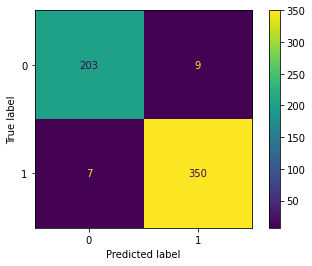

In [17]:
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
label = cluster.fit_predict(S) # pass similarity matrix not X

clusters= []
for j in range(2):
    clusters.append(X[np.array(label) ==j])
    
likely_confusion_matrix(y,label)

### Test on cricle data (sklearn vs. RF+Kmeans)

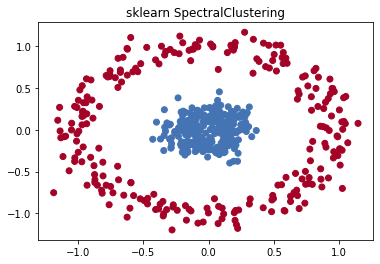

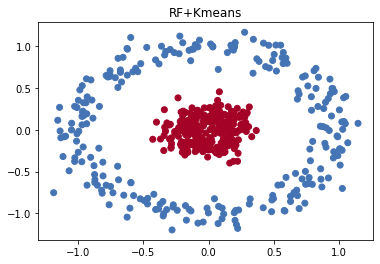

In [10]:
comp_adv()

> Our algorithm significantly outperformed the traditional Kmeans approach when dealing with the nested data structure. Even when we are comparing with sklearn’s API performance head to head, our algorithm still has a very satisfying outcome!

---

<a name="mf"></a>
## Limitations
* Randomness in RF will sometimes result in unexpected cluster labels (accuracy is not as steady)
* Kmeans++ only considers picking the furthest point to its previous centroid, take k=3 as an example, as consequence the 1st and 3rd controls can sometimes be quite close to each other. Is there a way to consider all the previous centroids and pick the furthest point from all the previous centroids? How do we even define the ‘minimum distance’ since each centroid has its own furthest points, one point can't be the furthest to multiple centroids?

---

<a name="ref"></a>
# References
* [K-Means Clustering: From A to Z](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)
* [ML | K-means++ Algorithm](https://www.geeksforgeeks.org/ml-k-means-algorithm/)
* [Image Segmentation using K Means Clustering](https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/)
* [Breiman's website](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#prox)